<h1 style="font-size:40px; text-align:center">Sentiment Identification</h1>

This is a very simple solution to the Analytics Vidhya problem given below:

https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

## Loading data

In [22]:
df = pd.read_csv('sentiment train.xls')
raw_tweets = df

## Exploring data

In [23]:
df.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [24]:
len(df)

7920

In [25]:
raw_tweets.label.unique()

array([0, 1], dtype=int64)

In [26]:
print("No of examples with label 0 ==> {}".format(df[df.label == 0].label.count()))
print("No of examples with label 1 ==> {}".format(df[df.label == 1].label.count()))
print(df[df.label == 1].label.count() + df[df.label == 0].label.count() == len(df))

No of examples with label 0 ==> 5894
No of examples with label 1 ==> 2026
True


In [27]:
samples = df.iloc[300:310].values
for _, label, sample in samples:
    print("Lebel: {}\n\t{}\n-------".format(label, sample))

Lebel: 0
	Fibs rhymes with Sibs, Nibs, Jibs, Bibs, Ribs, Dibs,... Start today with: http://bit.ly/rhymeapp #rhyme for #iPhone,
-------
Lebel: 0
	#OnePlus5 finally fixed, so fast, so efficient ! Thx #<3 #OnePlus
-------
Lebel: 1
	Thought it would be fun to jailbreak my iPod now I'm sitting here restoring it to factory settings #Apple #jailbreak
-------
Lebel: 0
	Love my fucking iPad!!! #rednose #musicevideo #blackfriday #walmart #apple #ipadmini http://instagram.com/p/hSVBQ_F5cb/
-------
Lebel: 1
	Why do people with iPhones have to keep showing me what they do?
-------
Lebel: 0
	Follow @capetownsup on Instagram http://mf.tt/rzwi4 #sup #surf #fun #capetown #funny #sexy #me #samsung pic.twitter.com/gfKCO06mqM
-------
Lebel: 0
	Photo: Meanwhile in twitter… #Samsung #GalaxyPocket #SamsungCheerdance #Blessed :’) #instafun... http://tmblr.co/ZiQpMyT_foco
-------
Lebel: 0
	@SamsungMobileUS honored me for using $5 in my first ever #Stock of mine @stockpile I'm Thank you, Samsung! #StockMarket #


1 => negative<br>
0 => positive/neutral


In [28]:
def filterTweets(tweets):
    cleanedTweets = []
    for tweet in tweets:
        tweet = tweet.split(' ')
        words = [ word for word in tweet if not word.startswith('#')]
        words = [ word for word in words if not word.startswith('@')]
        words = [ word for word in words if not word.startswith('http')]
        words = [ word for word in words if not word.startswith(':')]
        words = [ word for word in words if not word.startswith('^')]
        words = [ word for word in words if not word.startswith('.')]
        words = [word + ' ' for word in words]

        temp = []

        for word in words:
            if (word.find('$&@*#') != -1):
                temp.append('[vulgar] ')
            else:
                temp.append(word)
        cleanedTweets.append(''.join(temp).strip())
        
    return cleanedTweets
    
    

In [29]:
cleanedTweets = filterTweets(raw_tweets['tweet'].values)
df["cleaned_tweets"] = cleanedTweets
print(len(cleanedTweets))
df.head()

7920


,id,label,tweet,cleaned_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Test
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go?
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [11]:
from wordcloud import WordCloud

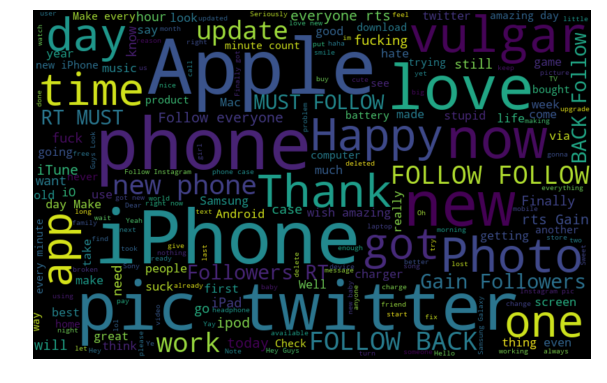

In [30]:
all_words = ' '.join([text for text in df.cleaned_tweets])
plt.figure(figsize=(10, 7))

wc = WordCloud(width = 800, height = 500, 
                      max_font_size = 110, random_state = 1).generate(all_words)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

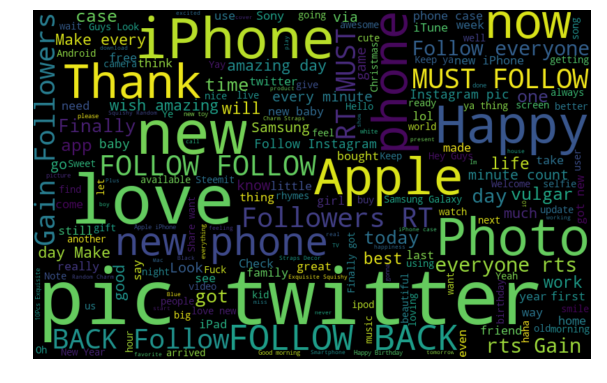

In [31]:
positive_tweets = ' '.join([text for text in df.cleaned_tweets[df.label == 0]])
plt.figure(figsize=(10, 7))

wc = WordCloud(width = 800, height = 500, 
                      max_font_size = 110, random_state = 1).generate(positive_tweets)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

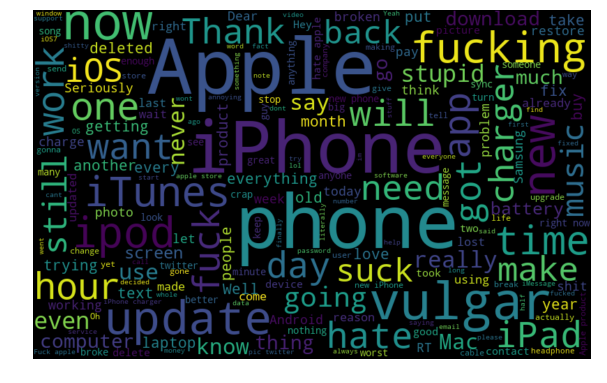

In [32]:
negtive_tweets = ' '.join([text for text in df.cleaned_tweets[df.label == 1]])
plt.figure(figsize=(10, 7))

wc = WordCloud(width = 800, height = 500, 
                      max_font_size = 110, random_state = 1).generate(negtive_tweets)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [10]:
train_df = pd.DataFrame(cleanedTweets, columns=['tweets'])
train_df['labels'] = raw_tweets.label
train_df.head()

,tweets,labels
0,Test,0
1,Finally a transparant silicon case Thanks to m...,0
2,We love this! Would you go?,0
3,I'm wired I know I'm George I was made that wa...,0
4,What amazing service! Apple won't even talk to...,1


In [11]:
cv = CountVectorizer()
tfidfTrasformer = TfidfTransformer(use_idf = False)

In [12]:
countVectorizedTweets = cv.fit_transform(train_df['tweets'])
countTransformedTweets = tfidfTrasformer.fit_transform(countVectorizedTweets)

In [13]:
target = train_df.labels

## Train/Test set preparation

In [62]:
x_train, x_test, y_train, y_test = train_test_split(countTransformedTweets, target, test_size = 0.2, 
                                                    stratify = target, random_state = 1)

In [63]:
x_train = x_train.todense()
x_test = x_test.todense()

In [64]:
print("--No of training examples--\nExamples: {} | {}".format(x_train.shape[0], y_train.shape[0]))
print("--No of test examples--\nExamples: {} | {}".format(x_test.shape[0], y_test.shape[0]))

--No of training examples--
Examples: 6336 | 6336
--No of test examples--
Examples: 1584 | 1584


In [54]:
pipelines = {
    'bnb': make_pipeline(BernoulliNB()),
    'rf': make_pipeline(RandomForestClassifier()),
    'dt': make_pipeline(DecisionTreeClassifier())
}

In [55]:
pipelines['dt'].get_params()

{'memory': None,
 'steps': [('decisiontreeclassifier',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, presort=False, random_state=None,
               splitter='best'))],
 'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decis

## Declare hyperparameters to tune

In [56]:
# BernoulliNB hyperparameters
bnb_hypers = {
    'bernoullinb__alpha': [0.1, 1, 1.5]
}

# Random Forest hyperparameters
rf_hypers = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]#, 0.5]
}

# Decision Tree hyperparameters
dt_hypers = {
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 0.33],
    'decisiontreeclassifier__max_depth': [1, 3, 5]
}

In [57]:
hypers = {
    'bnb': bnb_hypers,
    'rf': rf_hypers,
    'dt': dt_hypers
}

## Train the models

In [59]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypers[name], cv = None, n_jobs=-1)
    
    model.fit(x_train, y_train)
    fitted_models[name] = model
    
    print('{} has been fitted'.format(name))

bnb has been fitted
rf has been fitted
dt has been fitted


In [76]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("gnb has been fitted")

gnb has been fitted


## Evaluate Models

In [60]:
from sklearn.metrics import classification_report, accuracy_score

In [77]:
for name, model in fitted_models.items():
    preds = model.predict(x_test)
    print("{}\n--------\n{}".format(name, classification_report(y_test, preds)))

preds = gnb.predict(x_test)
print("{}\n--------\n{}".format(name, classification_report(y_test, preds)))

bnb
--------
             precision    recall  f1-score   support

          0       0.95      0.88      0.91      1179
          1       0.71      0.87      0.78       405

avg / total       0.89      0.88      0.88      1584

rf
--------
             precision    recall  f1-score   support

          0       0.87      0.92      0.90      1179
          1       0.73      0.60      0.66       405

avg / total       0.84      0.84      0.84      1584

dt
--------
             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1179
          1       0.63      0.47      0.54       405

avg / total       0.78      0.79      0.78      1584

dt
--------
             precision    recall  f1-score   support

          0       0.87      0.48      0.62      1179
          1       0.34      0.79      0.48       405

avg / total       0.73      0.56      0.58      1584



## Best Estimator
#### Bernoulli Naive Bayes seems to be the best estimator. Using it for predicting on unseen test data

In [67]:
best_estimator = fitted_models['bnb'].best_estimator_
best_estimator

Pipeline(memory=None,
     steps=[('bernoullinb', BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True))])

In [33]:
testdf = pd.read_csv('sentiment test.xls')

In [69]:
ids = testdf.id
features = testdf.tweet

In [70]:
cleanedFeatures = filterTweets(features)

In [71]:
cvFeatures = cv.transform(cleanedFeatures)
ctFeatures = tfidfTrasformer.transform(cvFeatures)

In [73]:
testPred = best_estimator.predict(ctFeatures.todense())

In [74]:
sub = pd.DataFrame(ids, columns=['id'])
sub['label'] = testPred

In [75]:
sub.to_csv('subBNB.csv', index=False)

### This submission achieved a F1 score of 86.1% on public leaderboard